22:35:16 - cmdstanpy - INFO - Chain [1] start processing
22:35:16 - cmdstanpy - INFO - Chain [1] done processing


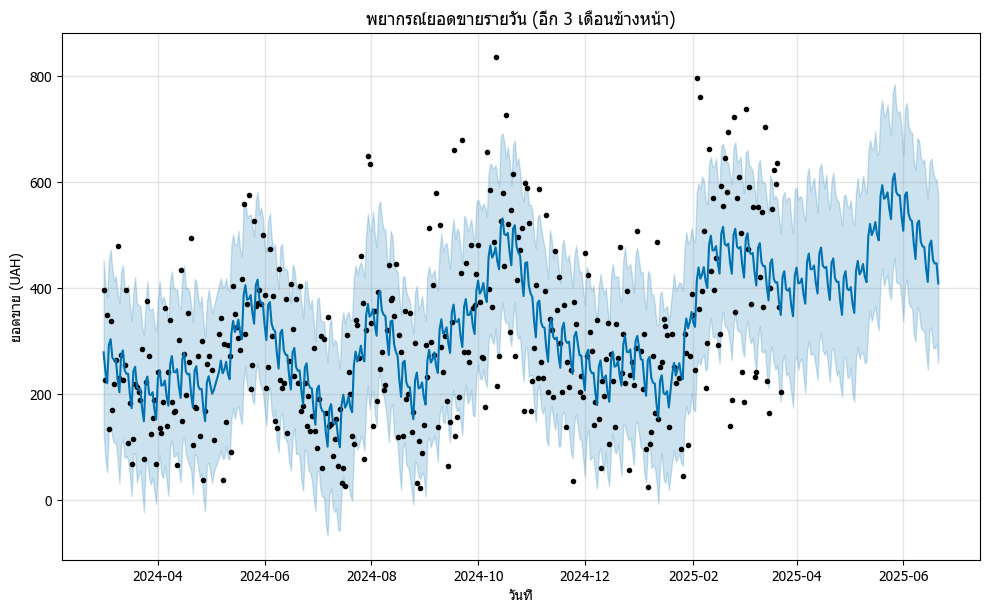

,ds,yhat,yhat_lower,yhat_upper
381,2025-03-24,421.647687,261.176247,573.095446
382,2025-03-25,432.547958,275.195887,582.337189
383,2025-03-26,398.669836,235.766143,562.373682
384,2025-03-27,395.612016,240.340218,571.020579
385,2025-03-28,400.290124,228.779800,571.087486
...,...,...,...,...
466,2025-06-17,490.322682,326.602822,645.529340
467,2025-06-18,453.497758,289.152463,622.980097
468,2025-06-19,446.948281,286.753976,606.080406
469,2025-06-20,447.493479,296.489919,605.831926


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 👇 Add this block to set Thai font for matplotlib
plt.rcParams['font.family'] = 'Tahoma'  # or 'Sarabun', 'Noto Sans Thai', etc.
# Ensure minus sign displays correctly
plt.rcParams['axes.unicode_minus'] = False

# 1. Load and Prepare Data
df = pd.read_csv("./source_data/coffee_sales.csv")
df['date'] = pd.to_datetime(df['date'])

# Aggregate to daily sales
daily_sales = df.groupby('date')['money'].sum().reset_index()
# Prophet ต้องใช้ชื่อคอลัมน์ ds = datetime, y = target
daily_sales.columns = ['ds', 'y']

# 2. สร้างโมเดลและ train
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(daily_sales)

# 3. สร้างช่วงวันที่จะพยากรณ์ (อนาคต 3 เดือน)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 4. Visualize
fig1 = model.plot(forecast)
plt.title('พยากรณ์ยอดขายรายวัน (อีก 3 เดือนข้างหน้า)')
plt.xlabel('วันที่')
plt.ylabel('ยอดขาย (UAH)')
plt.show()

# 5. Optional: ดูเฉพาะช่วงที่ forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)